<a href="https://colab.research.google.com/github/lalitbhattarai/Pytorch_Fundamentals/blob/main/Pytorch_Workflow_class_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Pytorch Worlflow


lets explore a an example PyTorch end-to-end workflow


In [1]:
Covered_in_Pytorch_notrbook={ 1: "data (prepare and load)",
                              2:"bulid model",
                              3:"fitting the model to data(training)",
                              4:"making prediction and evalution a model (interfrence)",
                              5:"saving and loading a model",
6:"putting it all together"}
Covered_in_Pytorch_notrbook



{1: 'data (prepare and load)',
 2: 'bulid model',
 3: 'fitting the model to data(training)',
 4: 'making prediction and evalution a model (interfrence)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn cointains all of the Pytorch building blocks fro neural netwoerk
import matplotlib.pyplot as plt

#Check the version
torch.__version__


'2.5.1+cu124'

##Data (Preparing and Loading)

data can be almost anything ..in machine learning
* Excel spreadsheet
* Images of any kind
* Vedio (youtube has lots of datas..)
* Audio like songs or podcast
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numeriacal representation

TO showcase this let's create some known data using the linear regression formula.

We'll use a lineaner regresion formula to make a straight line with *known*
**parameters**

In [3]:
#Create  *known* pareters
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step) .unsqueeze(dim=1)
y=weight*X + bias
X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting Data into training and tests sets (one of the most importanceconcepts in general)
Let's create  atraining and test set with our data





In [6]:
#Craate atrain/test Split
train_split =int(0.8 * len(X))
X_train ,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

In [7]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comses in!

"Visualize","Visualizze","Visualize"

In [34]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=12, label="Training Data")

    # Plot test data in red (Fixed incorrect y-axis)
    plt.scatter(test_data, test_labels, c="g", s=12, label="Test Data")

    # Plot predictions if available
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=12, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14})



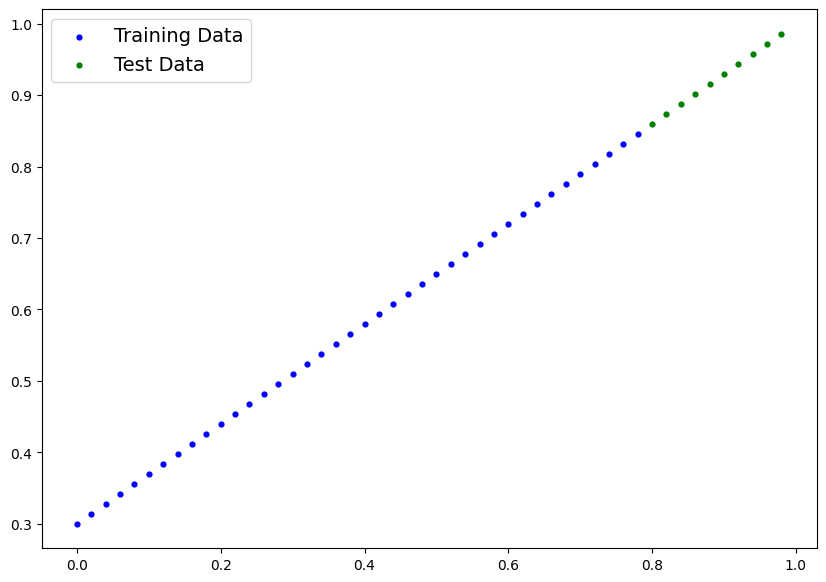

In [35]:
plot_predictions();

## 2. Bulid Model
Our first PyTorch model!
  
What does my model do?
* start with random values (weight and Bias
* Look at training data and adjust the random values to better
* look at training data and adjust the random values to better represent (or get closer to) the ideal vvalues (the weight and biasvalues we used to create the data )

How does it do so?(Algorithms)

1. Gradient decents
2. BackPropagation

In [40]:
#Create a linear regression model class
import torch
import torch.nn as nn


class LinearRegressionModel(nn.Module):  #almost everything in pytorch is inheriate form nn
    def __init__(self):
        super().__init__()
        self.weight =nn.Parameter(torch.rand(1,
                                         requires_grad=True,
                                         dtype=torch.float))

        self.bias =nn.parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch))


        #FOrward ,ethod to define the computational in the model

        def forward(self,x:torch.tensor) ->torch.Tensor:  #x is input data here
            return self.weight * x + self.bias  #This is a linear regression formula


